In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 로드 및 확인

In [2]:
# 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### 📌 **Feature 설명**

1. **gender**: 성별 (0 = 여성, 1 = 남성)
2. **Near_Location**: 헬스장이 집 또는 직장과 가까운지 여부 (1 = 가까움, 0 = 멀다)
3. **Partner**: 헬스장과 제휴된 기업 직원 여부 (1 = 제휴 기업 직원, 0 = 비제휴)
4. **Promo_friends**: 친구 추천 프로모션을 통해 가입했는지 여부 (1 = 예, 0 = 아니오)
5. **Phone**: 전화번호 제공 여부 (1 = 제공함, 0 = 제공 안 함)
6. **Contract_period**: 계약한 헬스장 이용 기간 (개월 단위, 1/6/12 등)
7. **Group_visits**: 단체 수업 참여 여부 (1 = 참여, 0 = 참여 안 함)
8. **Age**: 가입자의 나이
9. **Avg_additional_charges_total**: 총 추가 지출 비용 (추가 서비스나 상품 구매 금액)
10. **Month_to_end_contract**: 현재 계약이 종료되기까지 남은 개월 수
11. **Lifetime**: 헬스장 이용 개월 수 (가입 후 총 몇 개월 동안 이용했는지)
12. **Avg_class_frequency_total**: 전체 평균 수업 참여 빈도 (주 단위)
13. **Avg_class_frequency_current_month**: 최근 한 달간 평균 수업 참여 빈도 (주 단위)
14. **Churn**: 이탈 여부 (1 = 헬스장을 그만둔 회원, 0 = 유지한 회원)

In [3]:
# 결측값 확인
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


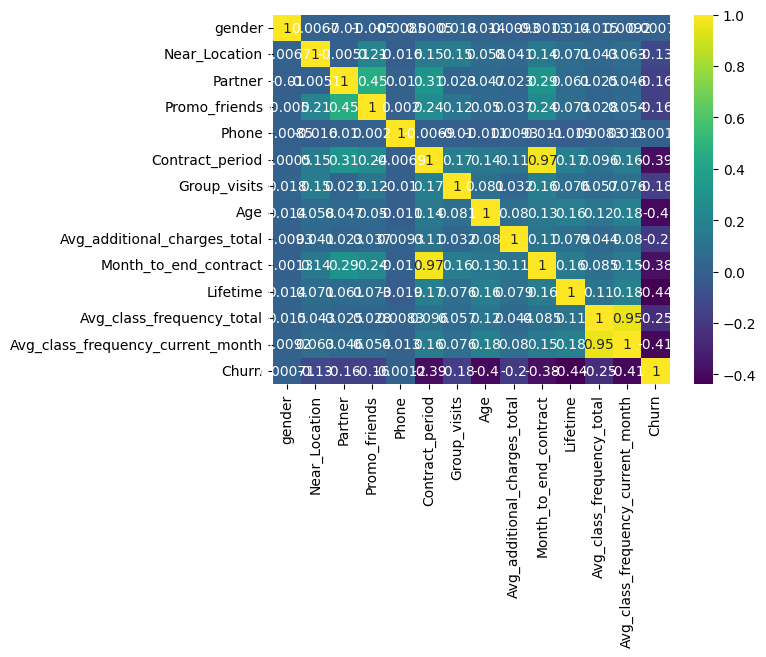

In [5]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

### 각 요소의 경향 파악

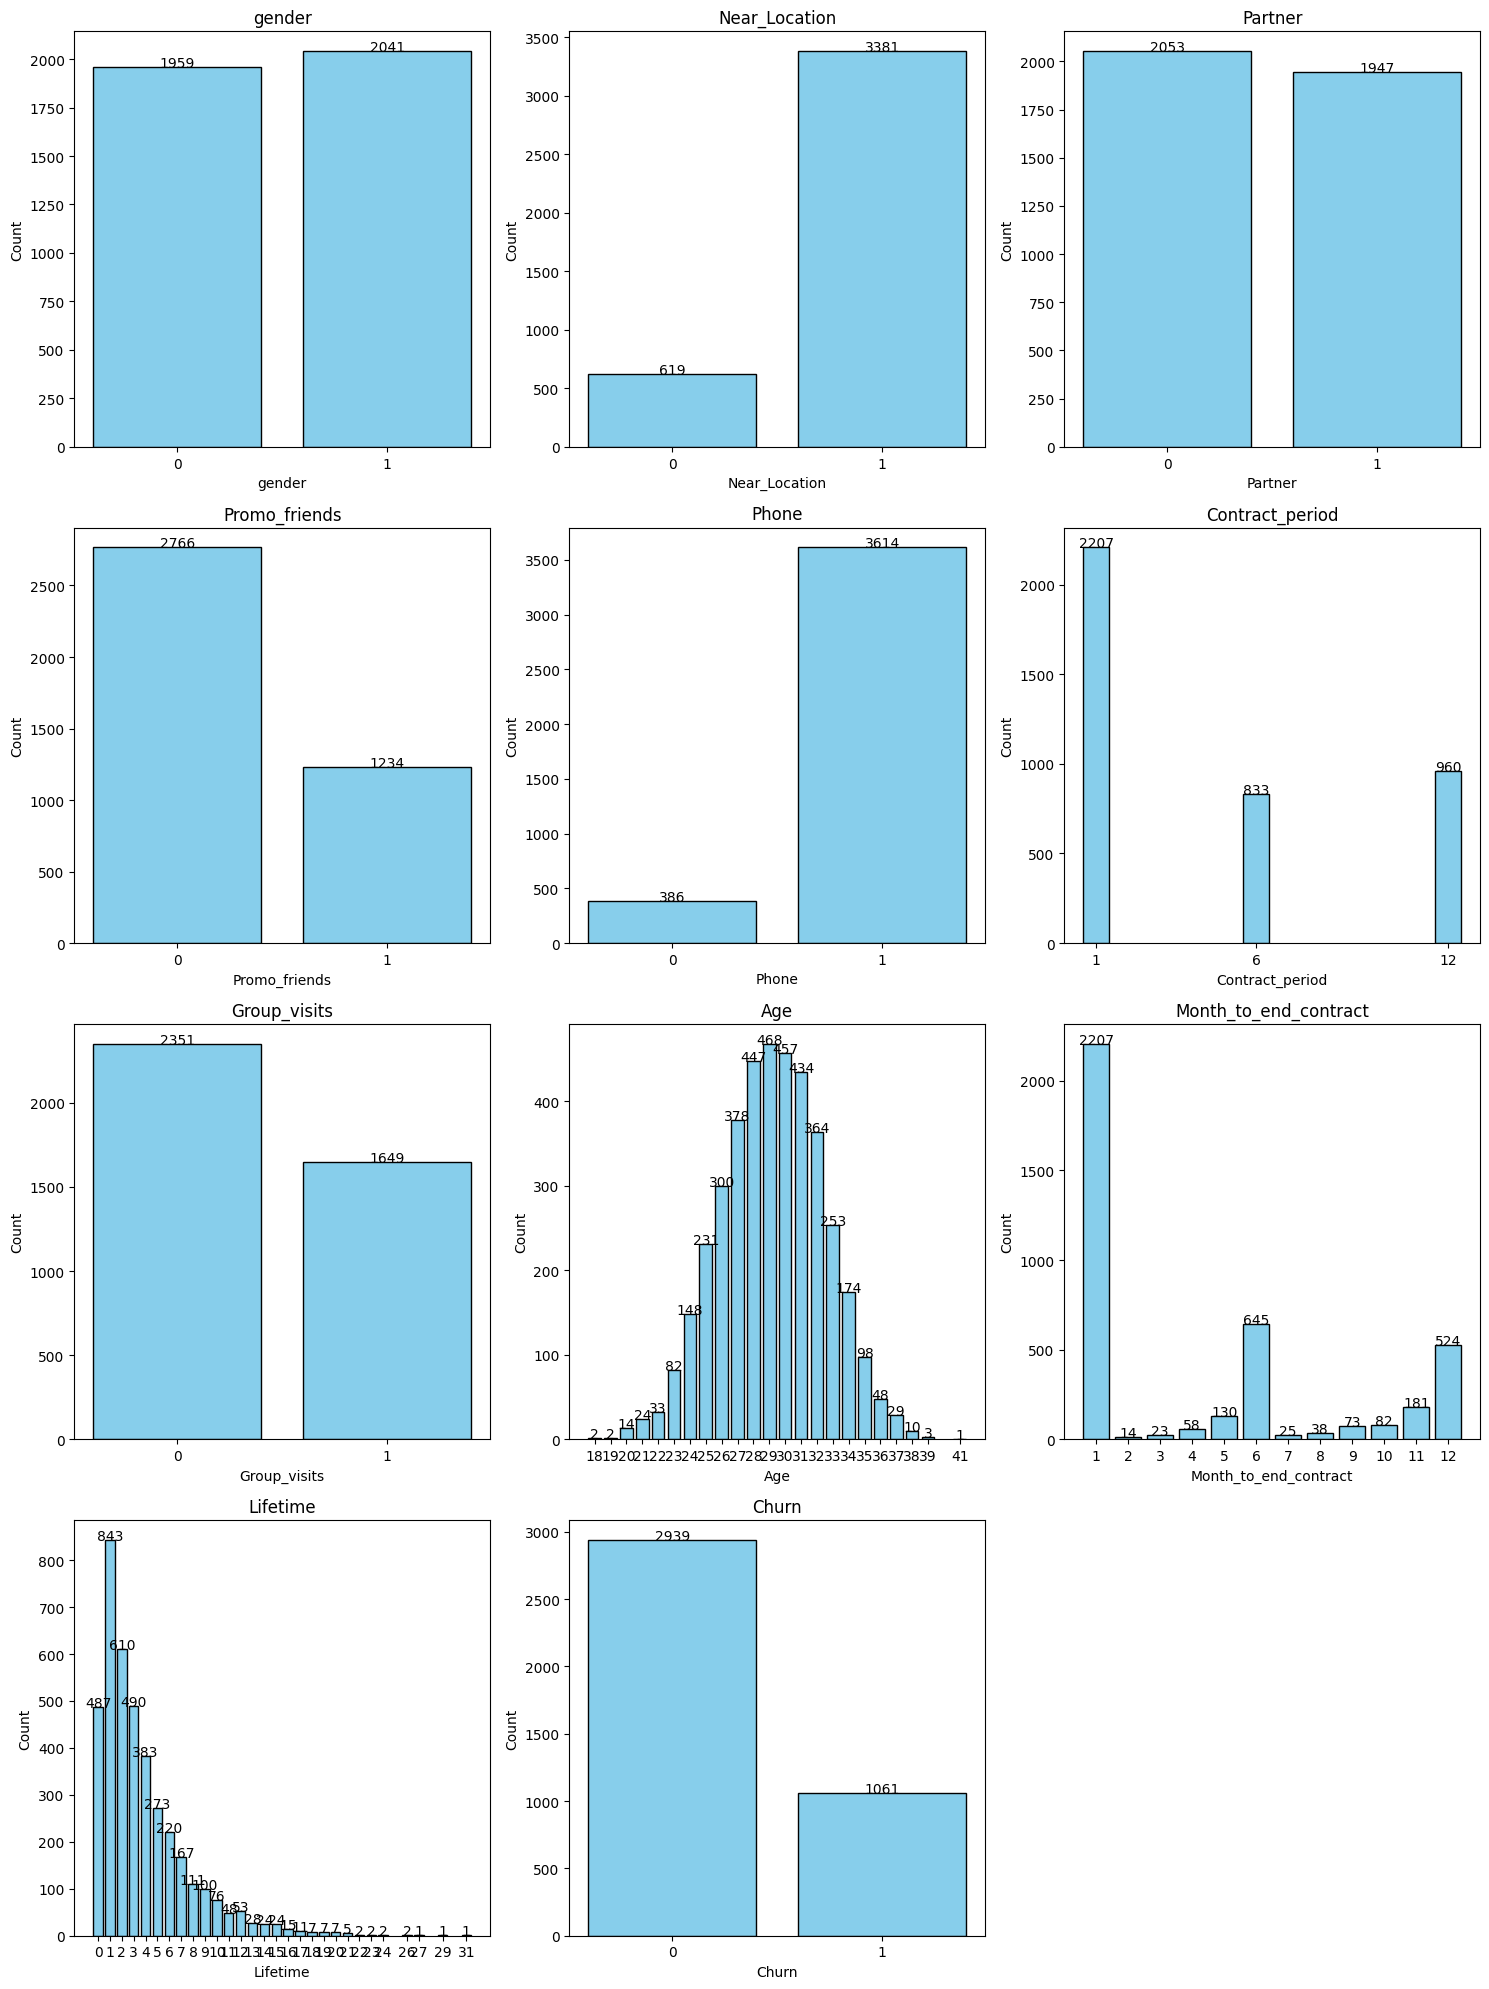

In [6]:
# 서브플롯 설정
fig, ax = plt.subplots(figsize=(15, 20), ncols=3, nrows=4)

# 개수 파악이 힘든 avg_ 컬럼 3개를 제외한 목록
df_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends',
              'Phone', 'Contract_period', 'Group_visits', 'Age',
                'Month_to_end_contract', 'Lifetime','Churn']

for i, col_name in enumerate(df_columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]  # 해당 서브플롯 지정

    value_counts = df[col_name].value_counts()  # 각 값의 개수 구하기

    bars = ax_temp.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    ax_temp.set_title(col_name)
    ax_temp.set_xlabel(col_name)
    ax_temp.set_ylabel('Count')

    # x축을 실제 값만 표시하도록 설정 (불필요한 값 제거)
    ax_temp.set_xticks(value_counts.index)

    # 막대 위에 개수 표시
    for bar in bars:
        height = bar.get_height()
        ax_temp.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), 
                     ha='center', fontsize=10)

    # x축 라벨 회전 (문자열 데이터인 경우 가독성 확보)
    if df[col_name].dtype == 'object':
        ax_temp.tick_params(axis='x', rotation=45)

# 빈 서브플롯 숨기기)
for i in range(len(df_columns), 3 * 4):
    fig.delaxes(ax.flatten()[i])

plt.tight_layout()
plt.show()